# Basic tour of the Bayesian Optimization package

This is a constrained global optimization package built upon bayesian inference and gaussian process, that attempts to find the maximum value of an unknown function in as few iterations as possible. This technique is particularly suited for optimization of high cost functions, situations where the balance between exploration and exploitation is important.

Bayesian optimization works by constructing a posterior distribution of functions (gaussian process) that best describes the function you want to optimize. As the number of observations grows, the posterior distribution improves, and the algorithm becomes more certain of which regions in parameter space are worth exploring and which are not, as seen in the picture below.

As you iterate over and over, the algorithm balances its needs of exploration and exploitation taking into account what it knows about the target function. At each step a Gaussian Process is fitted to the known samples (points previously explored), and the posterior distribution, combined with a exploration strategy (such as UCB (Upper Confidence Bound), or EI (Expected Improvement)), are used to determine the next point that should be explored (see the gif below).

This process is designed to minimize the number of steps required to find a combination of parameters that are close to the optimal combination. To do so, this method uses a proxy optimization problem (finding the maximum of the acquisition function) that, albeit still a hard problem, is cheaper (in the computational sense) and common tools can be employed. Therefore Bayesian Optimization is most adequate for situations where sampling the function to be optimized is a very expensive endeavor. See the references for a proper discussion of this method.

## 1. Specifying the function to be optimized

This is a function optimization package, therefore the first and most important ingreedient is, of course, the function to be optimized.

**DISCLAIMER:** We know exactly how the output of the function below depends on its parameter. Obviously this is just an example, and you shouldn't expect to know it in a real scenario. However, it should be clear that you don't need to. All you need in order to use this package (and more generally, this technique) is a function `f` that takes a known set of parameters and outputs a real number.

In [1]:
def black_box_function(x, y):
    """Function with unknown internals we wish to maximize.

    This is just serving as an example, for all intents and
    purposes think of the internals of this function, i.e.: the process
    which generates its output values, as unknown.
    """
    return -x ** 2 - (y - 1) ** 2 + 1

## 2. Getting Started

All we need to get started is to instanciate a `BayesianOptimization` object specifying a function to be optimized `f`, and its parameters with their corresponding bounds, `pbounds`. This is a constrained optimization technique, so you must specify the minimum and maximum values that can be probed for each parameter in order for it to work

In [2]:
from bayes_opt import BayesianOptimization

In [3]:
# Bounded region of parameter space
pbounds = {'x': (2, 4), 'y': (-3, 3)}

In [4]:
optimizer = BayesianOptimization(
    f=black_box_function,
    pbounds=pbounds,
    verbose=2, # verbose = 1 prints only when a maximum is observed, verbose = 0 is silent
    random_state=1,
)

The BayesianOptimization object will work out of the box without much tuning needed. The main method you should be aware of is `maximize`, which does exactly what you think it does.

There are many parameters you can pass to maximize, nonetheless, the most important ones are:
- `n_iter`: How many steps of bayesian optimization you want to perform. The more steps the more likely to find a good maximum you are.
- `init_points`: How many steps of **random** exploration you want to perform. Random exploration can help by diversifying the exploration space.

In [6]:
optimizer.maximize(
    init_points=2,
    n_iter=10,
)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
| 6         | -16.13    | 2.294     | -2.446    |
| 7         | -8.341    | 2.373     | -0.9266   |
| 8         | -3.189    | 2.001     | 0.5716    |
| 9         | -6.985    | 2.0       | 2.996     |
| 10        | -3.302    | 2.0       | 1.55      |
| 11        | -3.004    | 2.0       | 1.065     |
| 12        | -3.021    | 2.0       | 0.8538    |
| 13        | -3.051    | 2.0       | 1.225     |
| 14        | -3.0      | 2.0       | 0.9804    |
| 15        | -3.0      | 2.0       | 0.9907    |
| 16        | -3.0      | 2.0       | 0.9945    |
| 17        | -3.0      | 2.0       | 0.9979    |


/var/folders/lc/srks00r52vv89tckmyn8mfk80000gn/T/ipykernel_99417/489781707.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


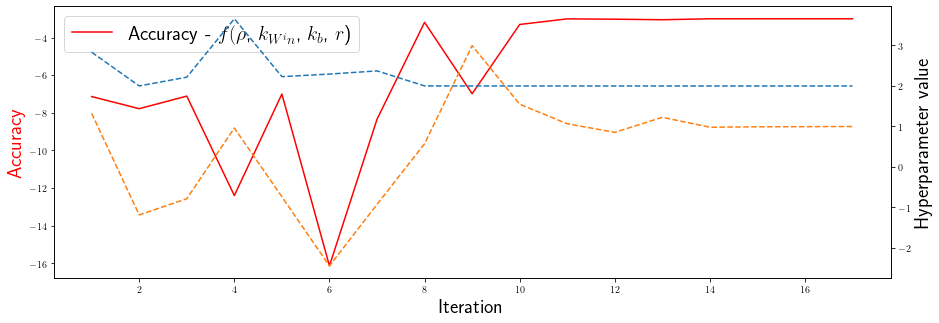

In [8]:
from matplotlib import pyplot as plt

plt.rcParams['text.usetex'] = True
fig, ax1 = plt.subplots(figsize = (15, 5))

ax2 = ax1.twinx()

# Scores:
ax1.plot(range(1, 1 + len(optimizer.space.target)), optimizer.space.target, color='r', label="Accuracy - $f(\\rho$, $k_{W^in}$, $k_b$, $r$)")

# Parameters
W_in_scale = []
b_scale = []
spectral_radius = []
weights = []

for res in optimizer.res:
    W_in_scale.append(res["params"]["x"])
    b_scale.append(res["params"]["y"])

if True:
    ax2.plot(range(1, 1 + len(optimizer.space.target)), W_in_scale, "--", label="x")
    ax2.plot(range(1, 1 + len(optimizer.space.target)), b_scale, "--", label="y")

ax1.set_xlabel('Iteration', fontsize = 20)
ax1.set_ylabel('Accuracy', color="r", fontsize = 20)
ax2.set_ylabel('Hyperparameter value', fontsize = 20)

ax1.legend(loc="upper left", fontsize = 20)
fig.show()

The best combination of parameters and target value found can be accessed via the property `bo.max`.

In [6]:
print(optimizer.max)

{'target': -4.441293113411222, 'params': {'y': -0.005822117636089974, 'x': 2.104665051994087}}


While the list of all parameters probed and their corresponding target values is available via the property `bo.res`.

In [7]:
for i, res in enumerate(optimizer.res):
    print("Iteration {}: \n\t{}".format(i, res))

Iteration 0: 
	{'target': -7.135455292718879, 'params': {'y': 1.3219469606529488, 'x': 2.8340440094051482}}
Iteration 1: 
	{'target': -7.779531005607566, 'params': {'y': -1.1860045642089614, 'x': 2.0002287496346898}}
Iteration 2: 
	{'target': -19.0, 'params': {'y': 3.0, 'x': 4.0}}
Iteration 3: 
	{'target': -16.29839645063864, 'params': {'y': -2.412527795983739, 'x': 2.3776144540856503}}
Iteration 4: 
	{'target': -4.441293113411222, 'params': {'y': -0.005822117636089974, 'x': 2.104665051994087}}


### 2.1 Changing bounds

During the optimization process you may realize the bounds chosen for some parameters are not adequate. For these situations you can invoke the method `set_bounds` to alter them. You can pass any combination of **existing** parameters and their associated new bounds.

In [8]:
optimizer.set_bounds(new_bounds={"x": (-2, 3)})

In [9]:
optimizer.maximize(
    init_points=0,
    n_iter=5,
)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  6        | -5.145    |  2.115    | -0.2924   |
|  7        | -5.379    |  2.337    |  0.04124  |
|  8        | -3.581    |  1.874    | -0.03428  |
|  9        | -2.624    |  1.702    |  0.1472   |
|  10       | -1.762    |  1.442    |  0.1735   |


## 3. Guiding the optimization

It is often the case that we have an idea of regions of the parameter space where the maximum of our function might lie. For these situations the `BayesianOptimization` object allows the user to specify specific points to be probed. By default these will be explored lazily (`lazy=True`), meaning these points will be evaluated only the next time you call `maximize`. This probing process happens before the gaussian process takes over.

Parameters can be passed as dictionaries such as below:

In [10]:
optimizer.probe(
    params={"x": 0.5, "y": 0.7},
    lazy=True,
)

Or as an iterable. Beware that the order has to be alphabetical. You can usee `optimizer.space.keys` for guidance

In [11]:
print(optimizer.space.keys)

['x', 'y']


In [12]:
optimizer.probe(
    params=[-0.3, 0.1],
    lazy=True,
)

In [13]:
optimizer.maximize(init_points=0, n_iter=0)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  11       |  0.66     |  0.5      |  0.7      |
|  12       |  0.1      | -0.3      |  0.1      |


## 4. Saving, loading and restarting

By default you can follow the progress of your optimization by setting `verbose>0` when instanciating the `BayesianOptimization` object. If you need more control over logging/alerting you will need to use an observer. For more information about observers checkout the advanced tour notebook. Here we will only see how to use the native `JSONLogger` object to save to and load progress from files.

### 4.1 Saving progress

In [14]:
from bayes_opt.logger import JSONLogger
from bayes_opt.event import Events

The observer paradigm works by:
1. Instantiating an observer object.
2. Tying the observer object to a particular event fired by an optimizer.

The `BayesianOptimization` object fires a number of internal events during optimization, in particular, everytime it probes the function and obtains a new parameter-target combination it will fire an `Events.OPTIMIZATION_STEP` event, which our logger will listen to.

**Caveat:** The logger will not look back at previously probed points.

In [15]:
logger = JSONLogger(path="./logs.json")
optimizer.subscribe(Events.OPTIMIZATION_STEP, logger)

In [16]:
optimizer.maximize(
    init_points=2,
    n_iter=3,
)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  13       | -12.48    | -1.266    | -2.446    |
|  14       | -3.854    | -1.069    | -0.9266   |
|  15       |  0.3932   |  0.3099   |  0.2853   |
|  16       |  0.8768   |  0.02197  |  0.6497   |
|  17       |  0.9446   |  0.198    |  0.8727   |


### 4.2 Loading progress

Naturally, if you stored progress you will be able to load that onto a new instance of `BayesianOptimization`. The easiest way to do it is by invoking the `load_logs` function, from the `util` submodule.

In [17]:
from bayes_opt.util import load_logs

In [18]:
new_optimizer = BayesianOptimization(
    f=black_box_function,
    pbounds={"x": (-2, 2), "y": (-2, 2)},
    verbose=2,
    random_state=7,
)
print(len(new_optimizer.space))

0


In [19]:
load_logs(new_optimizer, logs=["./logs.json"]);

In [20]:
print("New optimizer is now aware of {} points.".format(len(new_optimizer.space)))

New optimizer is now aware of 5 points.


In [21]:
new_optimizer.maximize(
    init_points=0,
    n_iter=10,
)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        |  0.6131   |  0.5571   |  0.7233   |
|  2        |  0.8609   | -0.3295   |  1.175    |
|  3        |  0.3761   |  0.2406   |  1.752    |
|  4        | -0.7845   | -0.8972   |  1.99     |
|  5        |  0.1401   | -0.8733   |  0.6882   |
|  6        | -1.798    |  1.545    |  1.642    |
|  7        |  0.9331   |  0.05549  |  1.253    |
|  8        | -5.369    |  2.0      | -0.5391   |
|  9        |  0.97     | -0.1587   |  0.9305   |
|  10       |  0.7718   |  0.4293   |  1.21     |


## Next Steps

This tour should be enough to cover most usage scenarios of this package. If, however, you feel like you need to know more, please checkout the `advanced-tour` notebook. There you will be able to find other, more advanced features of this package that could be what you're looking for. Also, browse the examples folder for implementation tips and ideas.